# Phase 2 - Data Understanding

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


warnings.filterwarnings("ignore")

files = glob.glob("../data/split/*.csv")
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

df.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,pixel3072,class
0,31.0,29.0,42.0,31.0,29.0,43.0,31.0,29.0,43.0,31.0,...,31.0,38.0,41.0,30.0,37.0,41.0,31.0,36.0,40.0,1
1,123.0,128.0,142.0,129.0,134.0,148.0,146.0,153.0,166.0,168.0,...,182.0,188.0,197.0,185.0,192.0,200.0,185.0,193.0,200.0,1
2,101.0,86.0,122.0,84.0,72.0,110.0,70.0,60.0,101.0,68.0,...,57.0,55.0,91.0,67.0,60.0,93.0,76.0,64.0,94.0,1
3,124.0,127.0,132.0,125.0,129.0,132.0,126.0,130.0,132.0,124.0,...,124.0,127.0,136.0,120.0,123.0,133.0,114.0,116.0,128.0,1
4,187.0,192.0,195.0,201.0,206.0,209.0,214.0,220.0,222.0,223.0,...,97.0,79.0,105.0,89.0,67.0,93.0,81.0,57.0,81.0,1


## 1 - Coleta Inicial e Descrição Geral dos Dados

Os dados foram obtidos, por meio do [OpenML](https://www.openml.org/search?type=data&status=active&id=42141&sort=runs), no qual baixamos os dados no fprmato de arff, e posteriormente dividimos os dados em 10 partes, totalizando 8 sub-datasets. Foi preciso realizar essa medida devido o limite de arquivos do github, que não permite arquivos acima de 100MB, e como precisamos compartilhar os dados com a equipe, precisaríamos deixar os dados de forma fácil para todos os membros e pessoas que queiram executar o projeto.


In [2]:
# Informações gerais sobre o dataset
df.info()

# Verificação de valores ausentes
print(f"\nNúmero total de valores ausentes: {df.isnull().sum().sum()}")

# Informações básicas sobre o dataset
n_registros = len(df)
n_features = len(df.columns) - 1 
nome_coluna_classe = df.columns[-1]

print(f"Número de registros (imagens): {n_registros}")
print(f"Número de features: {n_features} (32x32x3 = {32*32*3})")
print(f"Coluna de classe: {nome_coluna_classe}")
print(f"Shape do dataset: {df.shape}")

# Verificação de valores fora da escala RGB (0-255)
features_cols = df.columns[:-1]
valores_fora_escala = ((df[features_cols] < 0) | (df[features_cols] > 255)).sum().sum()

print(f"\nVALORES FORA DA ESCALA RGB:")
print(f"Valores fora da escala (0-255): {valores_fora_escala}")

# Análise da coluna de classe
print(f"\nANÁLISE DA COLUNA DE CLASSE:")
print(f"Tipo de dados da classe: {df[nome_coluna_classe].dtype}")
print(f"Número de classes únicas: {df[nome_coluna_classe].nunique()}")
print(f"Classes presentes: {sorted(df[nome_coluna_classe].unique())}")

# Verificação de consistência nos tipos de dados
print(f"\nTIPOS DE DADOS:")
tipos_features = df[features_cols].dtypes.value_counts()
print(f"Features: {tipos_features.to_dict()}")
print(f"Classe: {df[nome_coluna_classe].dtype}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48875 entries, 0 to 48874
Columns: 3073 entries, pixel1 to class
dtypes: float64(3072), int64(1)
memory usage: 1.1 GB

Número total de valores ausentes: 0
Número de registros (imagens): 48875
Número de features: 3072 (32x32x3 = 3072)
Coluna de classe: class
Shape do dataset: (48875, 3073)

VALORES FORA DA ESCALA RGB:
Valores fora da escala (0-255): 0

ANÁLISE DA COLUNA DE CLASSE:
Tipo de dados da classe: int64
Número de classes únicas: 10
Classes presentes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

TIPOS DE DADOS:
Features: {dtype('float64'): 3072}
Classe: int64


O dataset utilizado neste estudo, possui um total de 48.875 registros, cada um correspondendo a uma imagem de 32x32 pixels, representada por 3 canais de cores no formato RGB. Assim, cada imagem é descrita por 3.072 features (32x32x3), que correspondem aos valores de intensidade de cada pixel nos canais vermelho, verde e azul. A coluna final do dataset é dedicada à classe alvo, representando o número presente na imagem, com valores variando entre 1 e 10, sim, é até 10, o que indica a presença de 10 classes distintas. Abaixo, temos um exemplo de uma imagem dada uma linha.


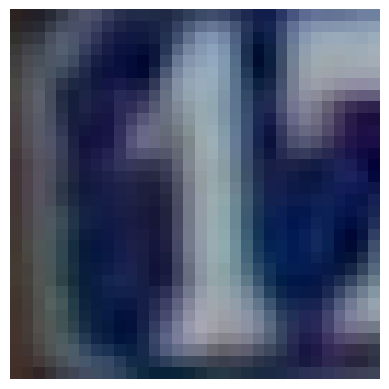

In [3]:
linha = df.iloc[7, :-1].values 

imagem = linha.reshape(32, 32, 3)

plt.imshow(imagem.astype(np.uint8))
plt.axis('off')
plt.show()


Ao realizar uma análise preliminar do dataset, verificamos que não há valores ausentes em nenhuma das colunas de features. Além disso, foi realizada uma verificação para identificar valores fora da escala esperada para as características RGB, que é de 0 a 255. A verificação resultou em zero valores fora da escala, o que indica que os dados das imagens estão dentro do intervalo adequado para análise. Essas análises são um indicativo de que a qualidade das imagens no dataset não apresenta distorções evidentes, nem fata de dados, que poderiam ocorrer devido a erros na coleta ou no processamento inicial dos dados.

Quanto à análise dos tipos de dados, as 3.072 colunas de características apresentam o tipo de dado `float64`, o que é esperado para valores contínuos, como é o caso das intensidades de cor dos pixels. A coluna da classe, por outro lado, tem o tipo de dado `int64`, adequado para representar valores inteiros que indicam a classe da imagem, no caso, os números de 1 a 10.

A distribuição das classes na coluna de destino foi verificada, e o dataset contém 10 classes distintas, representadas pelos números de 1 a 10. Isso reflete a natureza do problema, que é uma tarefa de classificação de dígitos, onde cada imagem corresponde a um número específico. Por fim, a análise inicial do dataset não revelou outliers evidentes ou inconsistências de dados. Não há registros com valores fora do intervalo permitido para as intensidades de cor (0-255), e os dados estão corretamente tipados, sem divergências que possam comprometer a modelagem. Essa consistência e integridade dos dados são fundamentais para garantir a qualidade do modelo de aprendizado de máquina que será treinado posteriormente.


## 2. Visualização de Dados

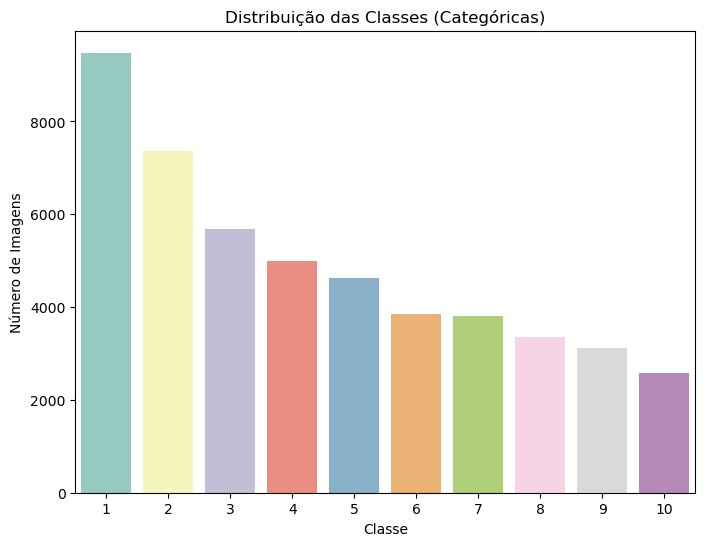

In [4]:
classe_counts = df[nome_coluna_classe].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x=df[nome_coluna_classe], palette="Set3")
plt.title('Distribuição das Classes (Categóricas)')
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.xticks(ticks=range(10), labels=sorted(df[nome_coluna_classe].unique()))
plt.show()


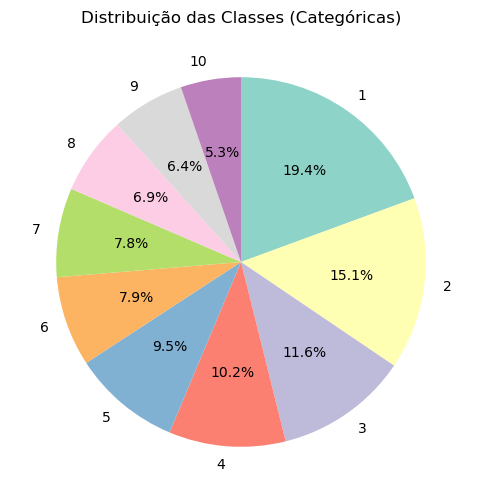

In [5]:
plt.figure(figsize=(8, 6))
classe_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", n_colors=10), counterclock=False)
plt.title('Distribuição das Classes (Categóricas)')
plt.ylabel('')
plt.show()


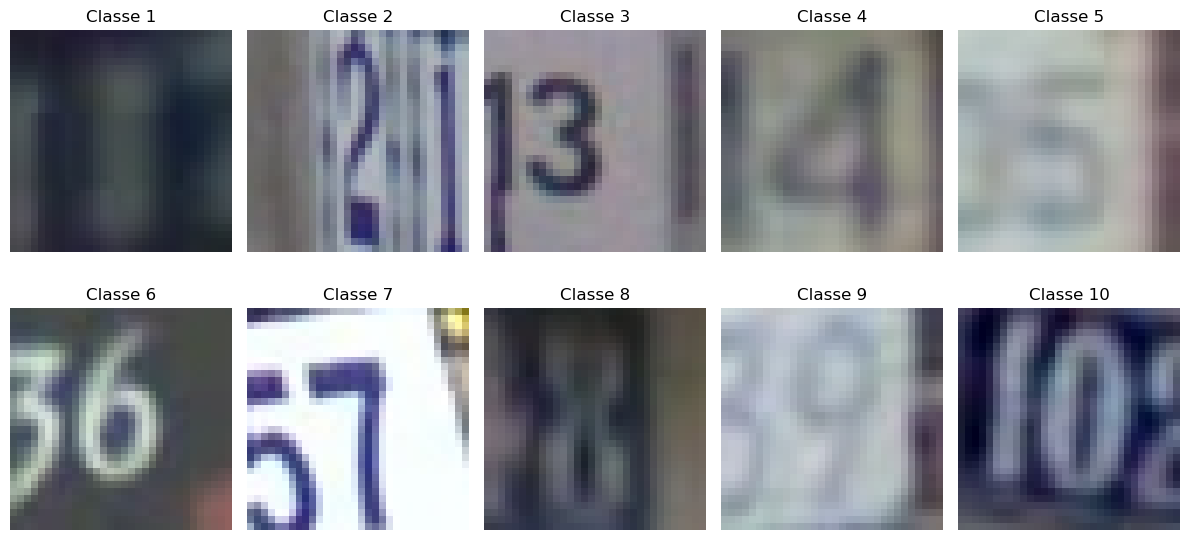

In [6]:
plt.figure(figsize=(12, 6))
for i in range(10):
    imagem_classe = df[df[nome_coluna_classe] == i+1].iloc[0, :-1].values  # Pega a primeira imagem de cada classe
    imagem_classe = imagem_classe.reshape(32, 32, 3)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(imagem_classe.astype(np.uint8))
    plt.title(f'Classe {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


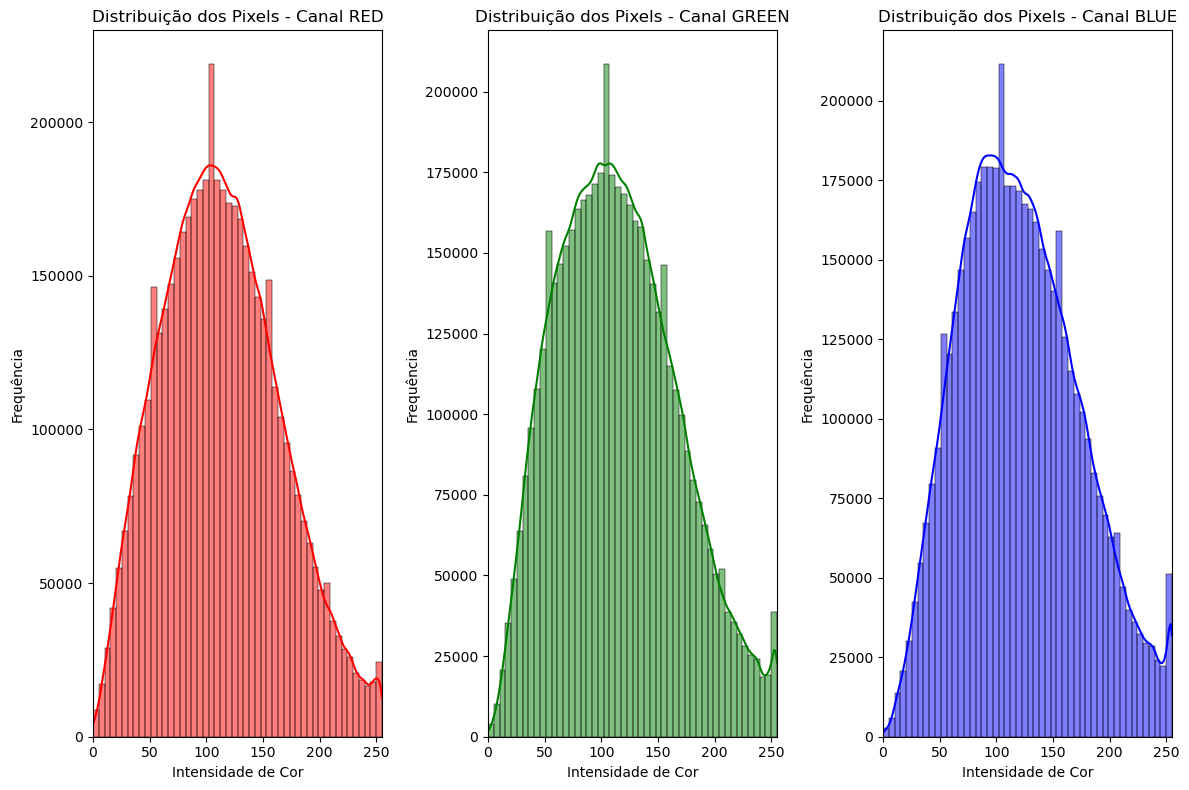

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando 10% aleatório do dataset
df_sample = df.sample(frac=0.1, random_state=42)

# Convertendo os valores dos pixels (de 32x32x3) para um vetor unidimensional
pixels = df_sample[df_sample.columns[:-1]].values.flatten()

# Plotando os histogramas para os canais R, G e B
plt.figure(figsize=(12, 8))

# Canais de cor: R, G e B
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    # Filtra os valores de cada canal (R, G e B)
    channel_data = pixels[i::3]  # Pega os valores de cada canal de cor (intercalados nos dados)
    sns.histplot(channel_data, bins=50, kde=True, color=color)
    plt.title(f'Distribuição dos Pixels - Canal {color.upper()}')
    plt.xlim(0, 255)  # Definir o limite de 0 a 255 para os valores RGB
    plt.xlabel('Intensidade de Cor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



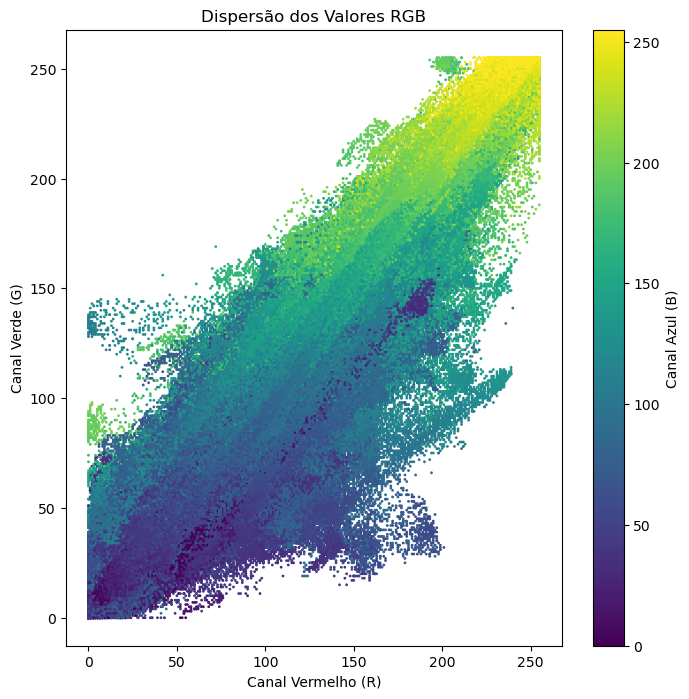

In [8]:
# Plotando um gráfico de dispersão RGB para todos os pixels
plt.figure(figsize=(8, 8))

# Canal R, G, B
plt.scatter(pixels[::3], pixels[1::3], c=pixels[2::3], cmap='viridis', s=1)
plt.title('Dispersão dos Valores RGB')
plt.xlabel('Canal Vermelho (R)')
plt.ylabel('Canal Verde (G)')
plt.colorbar(label='Canal Azul (B)')
plt.show()


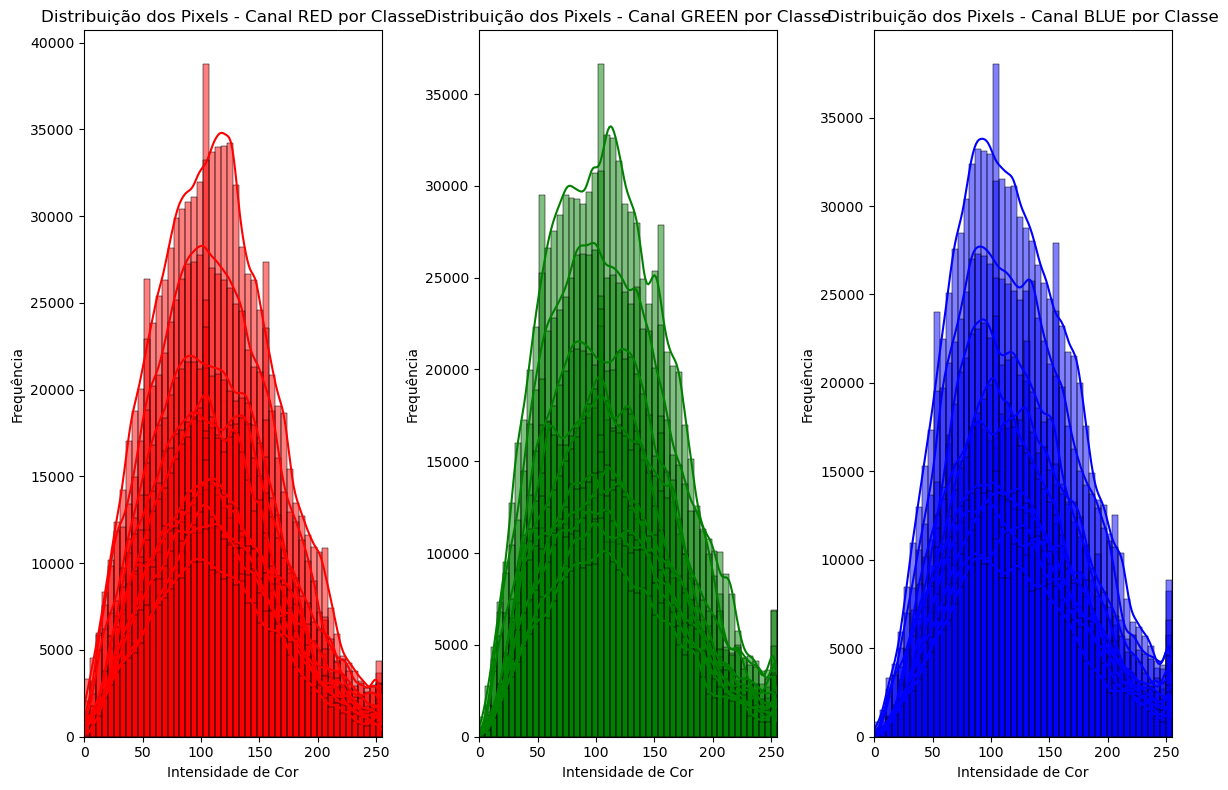

In [10]:
# Plotando histogramas comparativos para os canais R, G e B por classe
plt.figure(figsize=(12, 8))

# Canais de cor: R, G, B
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    # Plotando o histograma para cada classe
    for classe in sorted(df_sample[nome_coluna_classe].unique()):
        # Filtra os valores de cada canal por classe
        channel_data = df_sample[df_sample[nome_coluna_classe] == classe].iloc[:, i::3].values.flatten()
        sns.histplot(channel_data, bins=50, kde=True, label=f'Classe {classe}', color=color, alpha=0.5)
    plt.title(f'Distribuição dos Pixels - Canal {color.upper()} por Classe')
    plt.xlim(0, 255)  # Definir o limite de 0 a 255 para os valores RGB
    plt.xlabel('Intensidade de Cor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
